<h1 style="text-align: center; color: purple;" markdown="1"> QTM 151 Final Project - Section 5
</h1>

<h2 style="text-align: center; color: #012169" markdown="1"> Leslie Flores, Dave Melkani, Neha Murthy, and Sophie Shayne </h2>

## **Introduction**

## **Data Description**

#### **Imports**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

In [5]:
circuits = pd.read_csv("data_raw/circuits.csv")
drivers = pd.read_csv("data_raw/drivers.csv")
results = pd.read_csv("data_raw/results.csv") 
races = pd.read_csv("data_raw/races.csv")

In [6]:
# print("Ciruits Data: ")
# print(circuits.head())
# print("Drivers Data: ")
# print(drivers.head())
# print("Results Data: ")
# print(results.head())
# print("Races Data: ")
# print(races.head())

#### **Data Cleaning**

In [7]:
circuits["country"] = circuits["country"].replace(["United States"],["USA"])
drivers["nationality"] = drivers["nationality"].replace(["East German"],["German"])
drivers["nationality"] = drivers["nationality"].replace(["American-Italian"],["Italian"])

In [8]:
circuits["country"] = circuits["country"].replace(["UK"],["British"])
circuits["country"] = circuits["country"].replace(["Spain"],["Spanish"])
circuits["country"] = circuits["country"].replace(["Japan"],["Japanese"])
circuits["country"] = circuits["country"].replace(["France"],["French"])
circuits["country"] = circuits["country"].replace(["Brazil"],["Brazilian"])
circuits["country"] = circuits["country"].replace(["Italy"],["Italian"])
circuits["country"] = circuits["country"].replace(["Australia"],["Australian"])
circuits["country"] = circuits["country"].replace(["Austria"],["Austrian"])
circuits["country"] = circuits["country"].replace(["USA"],["American"])
circuits["country"] = circuits["country"].replace(["Netherlands"],["Dutch"])
circuits["country"] = circuits["country"].replace(["Portugal"],["Portuguese"])
circuits["country"] = circuits["country"].replace(["Canada"],["Canadian"])
circuits["country"] = circuits["country"].replace(["India"],["Indian"])
circuits["country"] = circuits["country"].replace(["Hungary"],["Hungarian"])
circuits["country"] = circuits["country"].replace(["Argentina"],["Argentine"])
circuits["country"] = circuits["country"].replace(["Malaysia"],["Malaysian"])
circuits["country"] = circuits["country"].replace(["Switzerland"],["Swiss"])
circuits["country"] = circuits["country"].replace(["Belgium"],["Belgian"])
circuits["country"] = circuits["country"].replace(["Monaco"],["Monegasque"])
circuits["country"] = circuits["country"].replace(["Sweden"],["Swedish"])
circuits["country"] = circuits["country"].replace(["Mexico"],["Mexican"])
circuits["country"] = circuits["country"].replace(["South Africa"],["South African"])
circuits["country"] = circuits["country"].replace(["Russia"],["Russian"])
circuits["country"] = circuits["country"].replace(["China"],["Chinese"])

#### **Merging**

In [9]:
races_merge = pd.merge(races,
                         circuits[["circuitId", "country"]],
                         on = "circuitId",
                         how = "left")

results_merge1 = pd.merge(results,
                         races_merge[["raceId", "country", "year"]],
                         on = "raceId",
                         how = "left")

results_merge_final = pd.merge(results_merge1,
                         drivers[["driverId", "nationality", "forename", "surname"]],
                         on = "driverId",
                         how = "left")

In [10]:
subset      = results_merge_final.query("milliseconds.str.isnumeric() == False")
list_unique = pd.unique(subset["milliseconds"])
print(list_unique)
list_old = ['\\N']
list_new = [np.nan]
results_merge_final["milliseconds"] = results_merge_final["milliseconds"].replace(list_old, list_new)

['\\N']


In [11]:
results_merge_final = results_merge_final.dropna()

In [12]:
results_merge_final['win_status'] = results_merge_final.groupby('raceId')['milliseconds'].apply(lambda x: (x == x.min()).astype(int))
results_merge_final['local_status'] = np.where(results_merge_final["nationality"] == results_merge_final["country"],1,0)

## **Results**

In [13]:
tn, fp, fn, tp = confusion_matrix(results_merge_final['win_status'], results_merge_final['local_status']).ravel()

print("            Not Hometown Racer        Hometown Racer")
print("Loser            {}                       {}".format(tn,fp))
print("Winner           {}                       {}".format(fn,tp))

            Not Hometown Racer        Hometown Racer
Loser            5614                       391
Winner           1005                       77


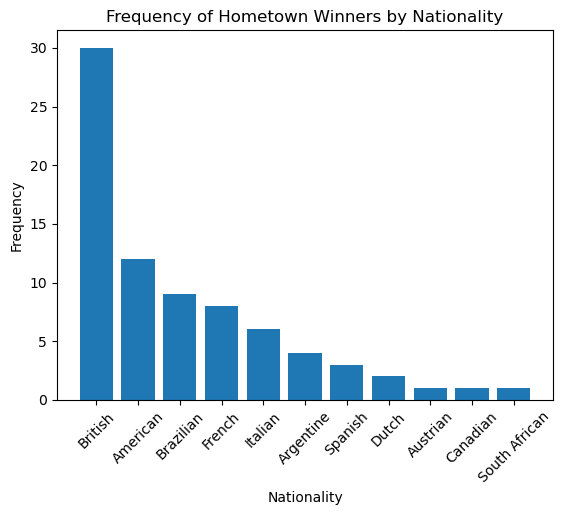

In [14]:
hometown_winner = results_merge_final.query("win_status == local_status & win_status == 1")

value_counts = hometown_winner["nationality"].value_counts()
fig, ax = plt.subplots(1,1)
ax.bar(value_counts.index, value_counts.values)
ax.set_ylabel("Frequency")
ax.set_xlabel("Nationality")
ax.set_title("Frequency of Hometown Winners by Nationality")
ax.xaxis.set_tick_params(rotation = 45)

## **Discussion**